In [1]:
import numpy as np

In [2]:
A = np.matrix([[2,3],[5,8],[3,10]])

In [3]:
A

matrix([[ 2,  3],
        [ 5,  8],
        [ 3, 10]])

In [4]:
X = np.dot(A,A.T); Y = np.dot(A.T,A)

In [5]:
print(X); print(Y)

[[ 13  34  36]
 [ 34  89  95]
 [ 36  95 109]]
[[ 38  76]
 [ 76 173]]


In [6]:
np.linalg.eig(X)

(array([ 2.07147676e+02, -4.54315158e-15,  3.85232418e+00]),
 matrix([[-0.24708166, -0.92039002, -0.30303937],
         [-0.64939247,  0.38939578, -0.65319243],
         [-0.71919405, -0.03539962,  0.6939069 ]]))

In [7]:
np.linalg.eig(Y)

(array([  3.85232418, 207.14767582]), matrix([[-0.91215637, -0.40984237],
         [ 0.40984237, -0.91215637]]))

In [8]:
import matplotlib.pyplot as plt

In [9]:
img = plt.imread("/home/subhasis/Desktop/Dog.jpg")

In [10]:
img.shape

(300, 332, 3)

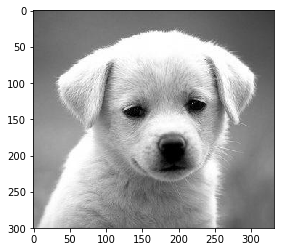

In [11]:
plt.imshow(img)

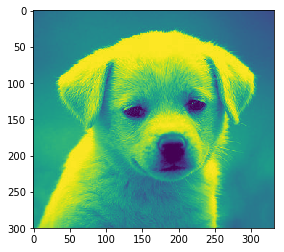

In [12]:
plt.imshow(img[:,:,0]) # Out of RGB color channels only the first channel in chosen so that SVD can be applied

In [13]:
img1 = img[:,:,0].reshape(300,332) # 3D array is converted to 2D array

In [14]:
img1

array([[ 89,  88,  88, ...,  61,  61,  60],
       [ 89,  89,  88, ...,  61,  61,  60],
       [ 90,  89,  89, ...,  61,  61,  61],
       ...,
       [144, 144, 145, ..., 103, 103, 102],
       [144, 144, 147, ..., 103, 103, 102],
       [144, 145, 149, ..., 103, 103, 102]], dtype=uint8)

In [15]:
from scipy.linalg import svd

In [16]:
U,S,V = svd(img1)

In [17]:
U.shape, S.shape, V.shape

((300, 300), (300,), (332, 332))

In [18]:
img_svd = np.dot(np.dot(U[:,:50], np.diag(S[:50])),V[:50,:]) # The original image matric is tried to be reconstructed with less number of aspects (50 in this case)

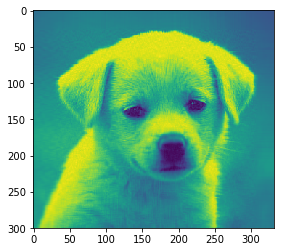

In [19]:
plt.imshow(img_svd)

In [20]:
U[:,:50]

array([[-0.03460643, -0.00949823, -0.00767057, ..., -0.01365892,
        -0.0003302 , -0.0034717 ],
       [-0.03466449, -0.00940574, -0.00762878, ..., -0.00914776,
        -0.005635  , -0.00381236],
       [-0.03480134, -0.00915396, -0.00714417, ..., -0.01536256,
        -0.0073417 , -0.0045033 ],
       ...,
       [-0.04813665,  0.04058792, -0.04821532, ..., -0.01373182,
         0.01278547, -0.00856204],
       [-0.04748473,  0.03907195, -0.04880051, ...,  0.00398285,
        -0.04115255,  0.00531483],
       [-0.04695819,  0.03799208, -0.04960535, ...,  0.00473194,
        -0.09389361,  0.01205507]])

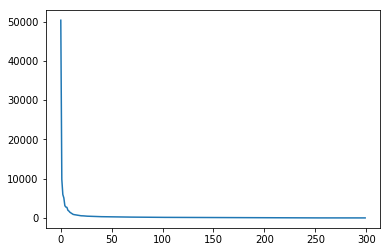

In [21]:
plt.plot(range(300),S) # Plot the singular values with respect to original number of dimensions to decide number of aspects
plt.show()